In [26]:
import numpy as np
import matplotlib.pyplot as plt

Features used to train the model:

In [27]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],[8.9],[5.2],[8.59],[2.1],[8],[10],[4.5],[6],[4]],dtype=np.float32)

    Target values used to train model:

In [28]:
y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.357],[2.6],[1.96],[3.53],[1.76],[3.2],[3.5],[1.6],[2.5],[2.2]],dtype=np.float32)

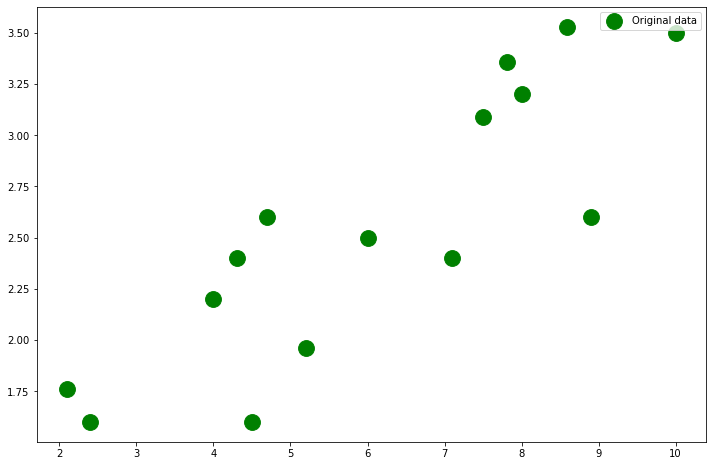

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [30]:
import torch

In [31]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


Defining size of input, hidden and output layers:

In [32]:
input_size, hidden_size, output_size = 1,1,1

In [50]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w3 = w1
w5 = w1
print('w1,w3,w5:',w1)

w1,w3,w5: tensor([[0.2779]], requires_grad=True)


In [51]:
w1.shape

torch.Size([1, 1])

Weight between hidden layer and output layer connection:

In [52]:
w2 = torch.rand(input_size, hidden_size, requires_grad=True)
w4 = w1
w6 = w1
print('w1,w3,w6:',w1)

w1,w3,w6: tensor([[0.2779]], requires_grad=True)


In [53]:
w2.shape

torch.Size([1, 1])

Learning rate (design hyperparameter, the size of the step the model tweaks toward the optimum):

In [54]:
lr = 1e-6
lr

1e-06

# Model Training

In [58]:
for i in range(1,10):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    if 0 == i%50:
        print(i, loss.item())
    loss.backward()
    

Update weights:

In [59]:
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

In [60]:
for i in range(1,100):
    y_pred = X_train.mm(w3).mm(w4)
    loss = (y_pred - Y_train).pow(2).sum()
    if 0 == i%50:
        print(i, loss.item())
    loss.backward()
    with torch.no_grad():
        w3 -= lr * w3.grad
        w4 -= lr * w4.grad
        w3.grad.zero_()
        w4.grad.zero_()

50 51.596336364746094


In [62]:
for i in range(1,1000):
    y_pred = X_train.mm(w5).mm(w6)
    loss = (y_pred - Y_train).pow(2).sum()
    if 0 == i%50:
        print(i, loss.item())
    loss.backward()
    with torch.no_grad():
        w5 -= lr * w5.grad
        w6 -= lr * w6.grad
        w5.grad.zero_()
        w6.grad.zero_()
    

50 39.881935119628906
100 34.23820495605469
150 28.979087829589844
200 24.224401473999023
250 20.053836822509766
300 16.5025577545166
350 13.5636625289917
400 11.196170806884766
450 9.336009979248047
500 7.907329559326172
550 6.832285404205322
600 6.037822246551514
650 5.459933757781982
700 5.045322895050049
750 4.751353740692139
800 4.544980525970459
850 4.401324272155762
900 4.302027225494385
950 4.233829498291016


In [63]:
print('w1: ',w1)
print('w2: ',w2)
print('w3: ',w3)
print('w4: ',w4)
print('w5: ',w5)
print('w6: ',w6)

w1:  tensor([[0.6199]], requires_grad=True)
w2:  tensor([[0.7647]], requires_grad=True)
w3:  tensor([[0.6199]], requires_grad=True)
w4:  tensor([[0.6199]], requires_grad=True)
w5:  tensor([[0.6199]], requires_grad=True)
w6:  tensor([[0.6199]], requires_grad=True)


Use final model weights w1 and w2 to predict:

In [64]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [42]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[0.5956],
        [0.3041],
        [0.9505],
        [0.8998],
        [0.5449],
        [0.9905],
        [1.1279],
        [0.6590],
        [1.0886],
        [0.2661],
        [1.0138],
        [1.2673],
        [0.5703],
        [0.7604],
        [0.5069]], grad_fn=<MmBackward0>)

In [65]:
predicted_in_tensor2 = x_train_tensor.mm(w3).mm(w4)
predicted_in_tensor

tensor([[0.5956],
        [0.3041],
        [0.9505],
        [0.8998],
        [0.5449],
        [0.9905],
        [1.1279],
        [0.6590],
        [1.0886],
        [0.2661],
        [1.0138],
        [1.2673],
        [0.5703],
        [0.7604],
        [0.5069]], grad_fn=<MmBackward0>)

In [66]:
predicted_in_tensor3 = x_train_tensor.mm(w5).mm(w6)
predicted_in_tensor

tensor([[0.5956],
        [0.3041],
        [0.9505],
        [0.8998],
        [0.5449],
        [0.9905],
        [1.1279],
        [0.6590],
        [1.0886],
        [0.2661],
        [1.0138],
        [1.2673],
        [0.5703],
        [0.7604],
        [0.5069]], grad_fn=<MmBackward0>)

In [67]:
predicted = predicted_in_tensor.detach().numpy()
predicted2 = predicted_in_tensor2.detach().numpy()
predicted3 = predicted_in_tensor3.detach().numpy()
predicted

array([[0.5956194 ],
       [0.30414608],
       [0.9504565 ],
       [0.8997655 ],
       [0.54492843],
       [0.9905024 ],
       [1.127875  ],
       [0.6589831 ],
       [1.0885895 ],
       [0.2661278 ],
       [1.0138203 ],
       [1.2672753 ],
       [0.5702739 ],
       [0.76036525],
       [0.50691015]], dtype=float32)

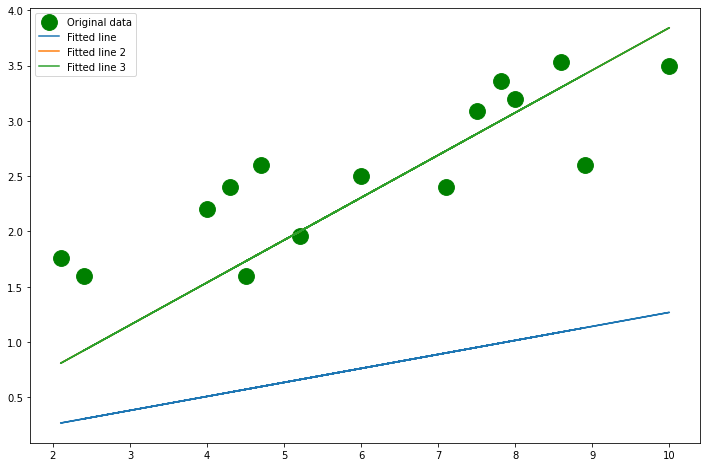

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.plot(x_train, predicted2, label = 'Fitted line 2')
plt.plot(x_train, predicted3, label = 'Fitted line 3')
plt.legend()
plt.show()